In [1]:
import transformers

/Users/krishrana/tmp/CMU/Sem 3/LLM/Implementations/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/krishrana/tmp/CMU/Sem 3/LLM/Implementations/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = transformers.AutoModelForCausalLM.from_pretrained('openai-community/gpt2')
print(model)
print(type(model))

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)
<class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'>


In [3]:
state_dict = model.state_dict()
for k, v in state_dict.items():
    print(f"{k}: {v.shape}\n")

transformer.wte.weight: torch.Size([50257, 768])

transformer.wpe.weight: torch.Size([1024, 768])

transformer.h.0.ln_1.weight: torch.Size([768])

transformer.h.0.ln_1.bias: torch.Size([768])

transformer.h.0.attn.c_attn.weight: torch.Size([768, 2304])

transformer.h.0.attn.c_attn.bias: torch.Size([2304])

transformer.h.0.attn.c_proj.weight: torch.Size([768, 768])

transformer.h.0.attn.c_proj.bias: torch.Size([768])

transformer.h.0.ln_2.weight: torch.Size([768])

transformer.h.0.ln_2.bias: torch.Size([768])

transformer.h.0.mlp.c_fc.weight: torch.Size([768, 3072])

transformer.h.0.mlp.c_fc.bias: torch.Size([3072])

transformer.h.0.mlp.c_proj.weight: torch.Size([3072, 768])

transformer.h.0.mlp.c_proj.bias: torch.Size([768])

transformer.h.1.ln_1.weight: torch.Size([768])

transformer.h.1.ln_1.bias: torch.Size([768])

transformer.h.1.attn.c_attn.weight: torch.Size([768, 2304])

transformer.h.1.attn.c_attn.bias: torch.Size([2304])

transformer.h.1.attn.c_proj.weight: torch.Size([768, 76

In [4]:
model.get_memory_footprint()

510342192

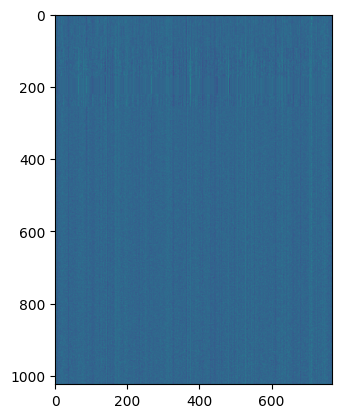

In [9]:
import matplotlib.pyplot as plt
token_embeddings = state_dict['transformer.wte.weight']
pos_embs = state_dict['transformer.wpe.weight']
plt.imshow(token_embeddings[:1024, :])

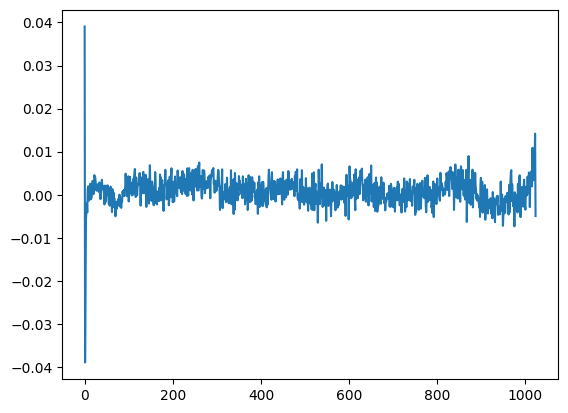

In [18]:
# plt.plot(pos_embs[:, 0])
# plt.plot(pos_embs[:, -1])
plt.plot(pos_embs[:, 322])

In [26]:
from transformers import pipeline, set_seed
set_seed(121)

model_pipeline = pipeline(task='text-generation', model = 'openai-community/gpt2')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [27]:
model_pipeline('hello, I am a language model', num_workers=4, max_length=30, num_return_sequences = 5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'hello, I am a language model for a data set. That is, to write a model, I create tables, and write a model with table'},
 {'generated_text': 'hello, I am a language model with an underlying knowledge of data, and I have very limited access to data that I care about; in doing so'},
 {'generated_text': "hello, I am a language model model.\n\nI like C++/MongoDB. I don't like JavaScript/Java, I think"},
 {'generated_text': 'hello, I am a language model and I\'ve just launched his app, called "Learn." Because of the kind words you put out there on the'},
 {'generated_text': 'hello, I am a language model of the world, and it has my heart in it. I work on the front end, with a lot of'}]

In [38]:
import torch
qk = torch.randn(size = (5, 5))
a = torch.tril(torch.ones_like(qk))
print(a)
print(a[:3, :3])

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])


In [31]:
qk

tensor([[-0.1427,  0.6957,  0.9458],
        [ 0.3109,  1.1036, -0.6569],
        [ 1.0224, -0.1652, -0.3375]])

In [32]:
qk_inf = torch.masked_fill(qk, mask=a[:, :] == 0, value=float('-inf'))
qk_inf

tensor([[-0.1427,    -inf,    -inf],
        [ 0.3109,  1.1036,    -inf],
        [ 1.0224, -0.1652, -0.3375]])

In [35]:
import torch.nn.functional as F
qk_inf = F.softmax(qk_inf, dim = -1)
qk_inf

tensor([[1.0000, 0.0000, 0.0000],
        [0.3116, 0.6884, 0.0000],
        [0.6404, 0.1953, 0.1644]])

In [36]:
torch.sum(qk_inf, dim = -1)

tensor([1., 1., 1.])

In [40]:
ab = torch.arange(64).view(4, 4, 4)


TypeError: cat() received an invalid combination of arguments - got (Tensor, dim=int), but expected one of:
 * (tuple of Tensors tensors, int dim, *, Tensor out)
 * (tuple of Tensors tensors, name dim, *, Tensor out)


In [1]:
from src.model import MultiHeadAttention, GPT2Config

config = GPT2Config()
config.n_embed = 768
config.n_heads = 8
config.n_block = 1024

mha = MultiHeadAttention(config=config)

In [2]:
import torch
B, T, C = 1, 3, config.n_embed

x = torch.randn(size=(B, T, C))
mha.forward(x)

q_mini: torch.Size([1, 8, 3, 96])
k: torch.Size([1, 3, 768])
v: torch.Size([1, 8, 3, 96])
96
768


AttributeError: 'builtin_function_or_method' object has no attribute 'view'